In [1]:
from TransversalitySheaf import *
from ConleySheaf import *
from FlowSheaf import *
from pychomp import *


import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
from Model import *

In [3]:
#model_name = 'double_cusp'
#model_name = 'cusp'
#model_name = 'qtlearning'
#model_name = 'replicator2D'
model_name = 'replicator1D'
model = Model(model_name)

In [4]:
base = GeometricCubicalComplex(model.base_bounds,model.base_boxes)
B = base.complex
phase_specs = [model.phase_bounds,model.phase_boxes]

In [5]:
[a_min,a_max],[b_min,b_max] = base.bounds
a_vert = [a_min+i*base.delta[0] for i in range(base.boxes[0]+1)]
b_vert = [b_min+i*base.delta[1] for i in range(base.boxes[1]+1)]

In [6]:
%%time
flow_sheaf = SheafFromVertices(TransversalitySheaf(base, model.ODE_Model, phase_specs, model.num_samples))

CPU times: user 13.5 s, sys: 389 ms, total: 13.9 s
Wall time: 13.8 s


In [7]:
%%time
graded_sheaf = GradeFlowSheaf(flow_sheaf)

CPU times: user 52.3 s, sys: 1.25 s, total: 53.6 s
Wall time: 53.9 s


In [8]:
%%time
conley_sheaf = ConleySheaf(graded_sheaf)

CPU times: user 1min 17s, sys: 1.7 s, total: 1min 19s
Wall time: 1min 20s


In [9]:
%%time
recurrent_sheaf = RecurrentSheaf(conley_sheaf)

CPU times: user 21.7 s, sys: 588 ms, total: 22.3 s
Wall time: 22.4 s


In [10]:
face_poset = base.face_poset

In [11]:
#face_poset

In [12]:
#DrawGradedComplex(GradedComplex(B,lambda x : x), Poset(face_poset))

In [13]:
def InducedPoset( G, predicate ):
    result = DirectedAcyclicGraph()
    S = set([v for v in G.vertices() if predicate(v)])
    for v in S:
        result.add_vertex(v)
    for v in S:
        for u in G.children(v):
            if u in S and u != v:
                result.add_edge(v,u)
    return Poset(result)
def subposet_iso(poset_map, A, B):
    #A,B the subposets
    img = [poset_map(v) for v in A.vertices()]
    img_set = set(img)
    if not len(img)==len(img_set):
        return False
    if not img_set==B.vertices():
        return False
    return True

In [14]:
# #Clustering algorithm, with flag for changing localization criterion
# reducedFlag = True
# localize = face_poset
# for (u,v) in face_poset.edges():
#     if B.rightfringe(u) or B.rightfringe(v): continue
#     conley_map = conley_sheaf.mapping[(u,v)]
#     gc_u = conley_sheaf.mapping[u]
#     gc_v = conley_sheaf.mapping[v]
#     #rc_u = InducedPoset(gc_u.poset, lambda v : v in gc_u.graded_complex.count() )
#     #rc_v = InducedPoset(gc_v.poset, lambda v : v in gc_v.graded_complex.count() )
#     if reducedFlag:
#         if subposet_iso(conley_map.poset_map, rc_v, rc_u):
#             #print(v,u)
#             localize.add_edge(v,u)
#     else:
#         if conley_map.poset_iso(conley_sheaf.mapping[v],conley_sheaf.mapping[u]):
#             #print(v,u)
#             localize.add_edge(v,u)

In [15]:
# #Clustering Algorithm 1
# localize = face_poset
# for (u,v) in face_poset.edges():
#     if B.rightfringe(u) or B.rightfringe(v): continue
#     conley_map = recurrent_sheaf.mapping[(u,v)]
#     gc_u = recurrent_sheaf.mapping[u]
#     gc_v = recurrent_sheaf.mapping[v]
#     if conley_map.poset_iso(gc_v,gc_u):
#         if gc_u.graded_complex.complex().size() != gc_v.graded_complex.complex().size():
#             print("Sizes not equal!")
#         if len(gc_u.poset.vertices()) != len(gc_v.poset.vertices()):
#             print("Sizes not equal!!")
#         #print(v,u)
#         localize.add_edge(v,u)
# #     if subposet_iso(conley_map.poset_map, gc_v.poset, gc_u.poset):
# #         if gc_u.graded_complex.complex().size() != gc_v.graded_complex.complex().size():
# #             print("Sizes not equal!")
# #         if len(gc_u.poset.vertices()) != len(gc_v.poset.vertices()):
# #             print("Sizes not equal!!")
# #         #print(v,u)
# #         localize.add_edge(v,u)

In [16]:
#Clustering Algorithm 2
localize = face_poset
for (u,v) in face_poset.edges():
    if B.rightfringe(u) and B.rightfringe(v): 
        localize.add_edge(v,u)
    else:
        if B.rightfringe(u) or B.rightfringe(v): continue
        conley_map = recurrent_sheaf.mapping[(u,v)]
        gc_u = recurrent_sheaf.mapping[u]
        gc_v = recurrent_sheaf.mapping[v]
        if len(gc_u.poset.vertices()) > len(gc_v.poset.vertices()):
            print("WHAT?!")
            print( len(gc_u.poset.vertices()),len(gc_v.poset.vertices()) )
            print(u,v)
        if conley_map.poset_iso(gc_v,gc_u):
            localize.add_edge(v,u)
#         if len(gc_u.poset.vertices()) == len(gc_v.poset.vertices()):
#             localize.add_edge(v,u)

In [17]:
#u,v = 523,83

In [18]:
#base.geometry(u),base.geometry(v)

In [19]:
#base.complex.boundary({u})

In [20]:
# gc_u = graded_sheaf.mapping[u]
# gc_v = graded_sheaf.mapping[v]

In [21]:
#DrawGradedComplex(gc_u.graded_complex,gc_u.poset)

In [22]:
#DrawGradedComplex(gc_v.graded_complex,gc_v.poset)

In [23]:
# fiber = set()
# for cell in gc_v.graded_complex.complex():
#     if gc_v.graded_complex.value(cell) == 19:
#         fiber.add(cell)
# fiber

In [24]:
# X = gc_v.graded_complex.complex()
# for cell in fiber:
#     print(cell,X.cell_dim(cell),X.boundary({cell}),X.barycenter(cell))

In [25]:
#gc_v.graded_complex.value(15)

In [26]:
#discrete_flow = flow_sheaf.mapping[v].discrete_flow

In [27]:
#top_cell = 407
#X.right(X.right(top_cell,0),0),X.right(X.right(top_cell,1),1)

In [28]:
#X.left(X.left(top_cell,0),0),X.left(X.left(top_cell,1),1)

In [29]:
#X.rightfringe(477)

In [30]:
# neighbors = [406,418,396,408]
# for n in neighbors:
#     print(n,discrete_flow[n])

In [31]:
# wall = 165
# X.coboundary({wall})

In [32]:
# new_edges = [(396,407)]
# s,t = new_edges[0]
# shape = X.cell_shape(wall)
# for i in range(X.dimension()):
#     if shape & (1 << i):
#         print(i)
#         s_right_nhbr = X.right(X.right(s,i),i)
#         t_right_nhbr = X.right(X.right(t,i),i)
#         s_left_nhbr =  X.left(X.left(s,i),i)
#         t_left_nhbr =  X.left(X.left(t,i),i)
#         print("S, right: "+str(s_right_nhbr)+" s, left: " + str(s_left_nhbr))
#         print("T, right: " + str(t_right_nhbr)+" t, left: " + str(t_left_nhbr))
#         print(str(s_right_nhbr) + " -> " + str(t_right_nhbr))
#         print(str(s_left_nhbr) + " -> " + str(t_left_nhbr))
# #         print(s_left_nhbr,s_right_nhbr)
# #         print(t_left_nhbr,t_right_nhbr)
# #             edges[s_right_nhbr].add(t_right_nhbr)
# #             edges[s_left_nhbr].add(t_left_nhbr)

In [33]:
#discrete_flow[397]

In [34]:
# if len(new_edges) == 1:
#     (s,t) = new_edges[0]
#     shape = C.cell_shape(wall)
# for d in range(C.dimension()):
#     if shape & (i << i):
#         s_right_nhbr = C.right(C.right(s,i),i)
#         t_right_nhbr = C.right(C.right(s,i),i)
#         s_left_nhbr =  C.left(C.left(s,i),i)
#         t_left_nhbr =  C.left(C.left(t,i),i)
#         edges[s_right_nhbr].add(t_right_nhbr)
#         edges[s_left_nhbr].add(s_left_nhbr)

In [35]:
scc,mapping = CondensationGraph(localize.vertices(), lambda x : localize.adjacencies(x))

In [36]:
#scc

In [37]:
#mapping

In [38]:
graded_base = GradedComplex(base.complex, lambda x : mapping[x])

In [39]:
# def poset_iso(gc_A,gc_B,gcMap):
#     poset_map = gcMap.poset_map
#     img = [poset_map(v) for v in gc_A.poset.vertices()]
#     img_set = set(img)
#     #Check injective
#     if not len(img)==len(img_set):
#         return False
#     #Check surjective
#     if not img_set==gc_B.poset.vertices():
#         return False
#     return True

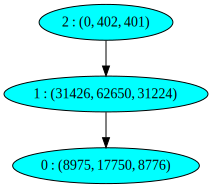

In [40]:
DrawGradedComplex(graded_base,Poset(scc))

In [41]:
# fibers = set()
# for cell in graded_base.complex():
#     if graded_base.value(cell) == 0 or graded_base.value(cell) == 1:
#         fibers.add(cell)
# fibers

In [42]:
for cell in graded_base.complex():
    if graded_base.value(cell) == 1:
        if recurrent_sheaf.mapping[cell].graded_complex.complex().size() != 1:
            print("Not 1!")

In [43]:
reduced_base = ConnectionMatrix(graded_base)

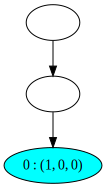

In [44]:
DrawGradedComplex(reduced_base,Poset(scc))

In [45]:
# for base_cube in B:
#     print(base_cube,B.cell_dim(base_cube),base.geometry(base_cube))

In [46]:
#mapping.values()

In [47]:
#Junk code ()
# inv_mapping = {}
# for target in set(mapping.values()):
#     inv_mapping[target] = []
#     for key in mapping.keys():
#         if mapping[key]==target:
#             inv_mapping[target] += [key]

In [48]:
#inv_mapping

In [49]:
# for v in inv_mapping.keys():
#     print("Component: " + str(v))
#     for base_cube in inv_mapping[v]:
#         print(base_cube,B.cell_dim(base_cube),base.geometry(base_cube))

In [50]:
# fig, ax = plt.subplots()
# plt.title('Parameter Space')

# plt.xlabel('a')
# plt.ylabel('b')
# plt.grid(True)
# plt.xticks(a_vert)
# plt.yticks(b_vert)
# #plt.grid()
# plt.xlim(a_min, a_max)
# plt.ylim(b_min, b_max)
# plt.show()

In [51]:
data = np.zeros((base.boxes[1],base.boxes[0]))
data.shape

(200, 200)

In [52]:
for top_cell in B(B.dimension()):
    if B.rightfringe(top_cell): continue
    a,b = B.coordinates(top_cell)
    data[b,a] = mapping[top_cell]

In [53]:
data

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [54]:
data_values = set()
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data_values.add(data[i,j])
data_values

{0.0, 1.0}

In [55]:
#b_vert

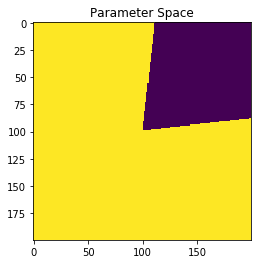

In [56]:

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots()

ax.imshow(data)
#plt.matshow(data)
plt.title('Parameter Space')

#ax.grid(True)
#ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
#ax.set_xticks(a_vert)
#ax.set_yticks(b_vert)
#ax.imshow(data)
# draw gridlines
#ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
#plt.xlabel('a')
#plt.ylabel('b')
#plt.grid(True)
#plt.xticks(a_vert)
#plt.yticks(b_vert)
#plt.xlim(a_min, a_max)
#plt.ylim(b_min, b_max)
plt.show()

In [57]:
# for top_cell in B(B.dimension()):
#     print(top_cell,B.coordinates(top_cell))

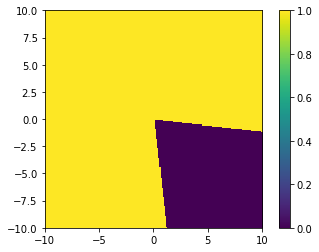

In [58]:
xmin,xmax = base.bounds[0]
ymin,ymax = base.bounds[1]
plt.imshow(data,extent=[xmin,xmax,ymin,ymax],origin='lower')
plt.colorbar()
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)
X, Y = np.meshgrid(x,y)
if model_name.lower()=='cusp':
    F = 4*X**3-27*Y**2
    plt.contour(X,Y,F,[0],colors=('b'))
if model_name.lower()=='double_cusp':
    F = 4*X**3-27*Y**2
    plt.contour(X,Y,F,[0],colors=('r'))
#plt.show()

In [59]:
#Plot data matrix of number of nontrivial indices
data = np.zeros((base.boxes[1],base.boxes[0]))
for top_cell in B(B.dimension()):
    if B.rightfringe(top_cell): continue
    a,b = B.coordinates(top_cell)
    #print(a,b)
    data[(base.boxes[1]-1)-b,a] = conley_sheaf.mapping[top_cell].graded_complex.complex().size()

In [60]:
data

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 3., 3., 3.],
       [1., 1., 1., ..., 3., 3., 3.],
       [1., 1., 1., ..., 3., 3., 3.]])

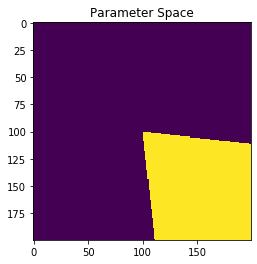

In [61]:
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots()

ax.imshow(data)
#plt.matshow(data)
plt.title('Parameter Space')

#ax.grid(True)
#ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
#ax.set_xticks(a_vert)
#ax.set_yticks(b_vert)
#ax.imshow(data)
# draw gridlines
#ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
#plt.xlabel('a')
#plt.ylabel('b')
#plt.grid(True)
#plt.xticks(a_vert)
#plt.yticks(b_vert)
#plt.xlim(a_min, a_max)
#plt.ylim(b_min, b_max)
plt.show()